# Notebook to try to get the CPI (Consumer Price Index) for USA and Uruguay from the World Bank API

## World Bank Explaination on the data

```
Consumer price index (2010 = 100)

Consumer price index reflects changes in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used. Data are period averages.

    Source: International Monetary Fund, International Financial Statistics and data files.
    License:  CC BY-4.0 
    Base Period: 2010
    
Development Relevance: A general and continuing increase in an economy’s price level is called inflation. The increase in the average prices of goods and services in the economy should be distinguished from a change in the relative prices of individual goods and services. Generally accompanying an overall increase in the price level is a change in the structure of relative prices, but it is only the average increase, not the relative price changes, that constitutes inflation. A commonly used measure of inflation is the consumer price index, which measures the prices of a representative basket of goods and services purchased by a typical household. The consumer price index is usually calculated on the basis of periodic surveys of consumer prices. Other price indices are derived implicitly from indexes of current and constant price series.

Limitations and Exceptions: Consumer price indexes should be interpreted with caution. The definition of a household, the basket of goods, and the geographic (urban or rural) and income group coverage of consumer price surveys can vary widely by country. In addition, weights are derived from household expenditure surveys, which, for budgetary reasons, tend to be conducted infrequently in developing countries, impairing comparability over time. Although useful for measuring consumer price inflation within a country, consumer price indexes are of less value in comparing countries.

Long Definition: Consumer price index reflects changes in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used. Data are period averages.

Periodicity: Annual

Statistical Concept and Methodology: Consumer price indexes are constructed explicitly, using surveys of the cost of a defined basket of consumer goods and services.
```

In [1]:
import requests
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

Let's try to get some Consumer Price Indexes

In [2]:
CPI_CODE = 'FP.CPI.TOTL'

In [3]:
def download_index(country_code, 
                   index_code, 
                   start_date=1960, 
                   end_date=2018):
    """
    Get a JSON response for the index data of one country.
    
    Args:
        country_code(str): The two letter code for the World Bank webpage
        index_code(str): The code for the index to retreive
        start_date(int): The initial year to retreive
        end_date(int): The final year to retreive
    
    Returns:
        str: a JSON string with the raw data
    """
    payload = {'format': 'json', 
               'per_page': '500', 
               'date':'{}:{}'.format(str(start_date), str(end_date))
              }
    r = requests.get(
        'http://api.worldbank.org/v2/countries/{}/indicators/{}'.format(
            country_code, index_code), params=payload)
    return r

In [4]:
def format_response(raw_res):
    """
    Formats a raw JSON string, returned from the World Bank API into a 
    pandas DataFrame.
    """
    result = defaultdict(dict)
    for record in raw_res.json()[1]:
        result[record['country']['value']].update(
            {record['date']: record['value']})

    return pd.DataFrame(result)

In [5]:
def download_cpi(country_code, **kwargs):
    """
    Downloads the Consumer Price Index for one country, and returns the data
    as a pandas DataFrame.
    
    Args:
        country_code(str): The two letter code for the World Bank webpage
        **kwargs: Arguments for 'download_index', for example:
            start_date(int): The initial year to retreive
            end_date(int): The final year to retreive
    """
    CPI_CODE = 'FP.CPI.TOTL'
    raw_res = download_index(country_code, CPI_CODE, **kwargs)
    return format_response(raw_res)

In [6]:
def download_cpis(country_codes, **kwargs):
    """
    Download many countries CPIs and store them in a pandas DataFrame. 
    
    Args:
        country_codes(list(str)): A list with the two letter country codes
        **kwargs: Other keyword arguments, such as:
            start_date(int): The initial year to retreive
            end_date(int): The final year to retreive
    
    Returns:
        pd.DataFrame: A dataframe with the CPIs for all the countries in the 
            input list.
    """
    cpi_list = [download_cpi(code, **kwargs) for code in country_codes]
    return pd.concat(cpi_list, axis=1)

### Testing

In [7]:
cpi = download_cpis(['uy', 'us'])
print(cpi.shape)
cpi.head()

(58, 2)


,Uruguay,United States
1960,0.000004,13.563061
1961,0.000005,13.708284
1962,0.000005,13.872615
1963,0.000006,14.044590
1964,0.000009,14.224207


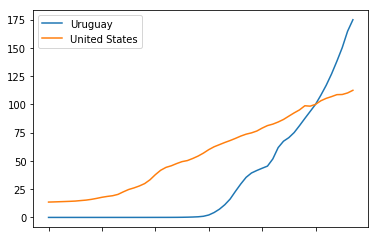

In [8]:
cpi.plot()

In [9]:
res = download_index('uy', 'FP.CPI.TOTL', 1960, 2017)

In [10]:
cpi = format_response(res)
print(cpi.shape)
cpi.head()

(58, 1)


,Uruguay
1960,0.000004
1961,0.000005
1962,0.000005
1963,0.000006
1964,0.000009


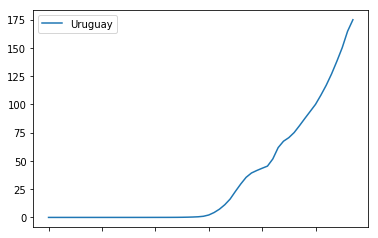

In [11]:
cpi.plot()

In [12]:
END_DATE = 2018

cpi = download_cpi('uy', end_date=END_DATE).join(
    download_cpi('us', end_date=END_DATE))
print(cpi.shape)
cpi.head()

(58, 2)


,Uruguay,United States
1960,0.000004,13.563061
1961,0.000005,13.708284
1962,0.000005,13.872615
1963,0.000006,14.044590
1964,0.000009,14.224207


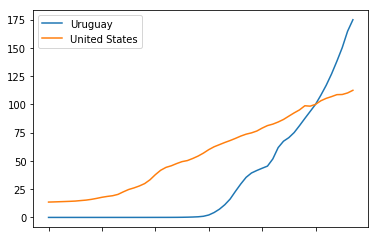

In [13]:
cpi.plot()